In [2]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle
import pathlib
from sklearn.externals import joblib

import datetime
import scipy.fftpack as fftp
import os

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
folder_name='../STMDATA/2019-02-25/'

def create_drive(zdata, dt2, tf, freqs):
    fbottom2 = np.fft.fft(zdata)
    freq2 = np.fft.fftfreq(len(zdata),dt2)
    freq2[freq2 > freqs[np.argmax(freqs)]] = freqs[np.argmax(freqs)]
    freq2[freq2 < freqs[np.argmin(freqs)]] = freqs[np.argmin(freqs)]
    driver = np.fft.ifft(tf(freq2)*fbottom2)
    return driver

def fit_cancel(array, n=1):
    t=linspace(0,len(array),len(array))
    fit = polyfit(t,array,n)
    corrective = fit[n]*ones(shape(t))
    for j in arange(n):
        corrective += fit[j]*(t**(n-j))
    return array - corrective

[transf, freqs] = joblib.load('../STMDATA/2019-02-21/long_trx')

In [4]:
dat=loadtxt(folder_name+'fbofflockin_500mV_10khz-001.dat',skiprows=6)
for i in arange(2,384):
    dat = concatenate((dat,loadtxt(folder_name+'fbofflockin_500mV_10khz-'+str(i).zfill(3)+'.dat',skiprows=6)))

MemoryError: 

In [5]:
shape(dat)

(9557200, 8)

In [ ]:
liy = dat[:,7]
geo = dat[:,2]

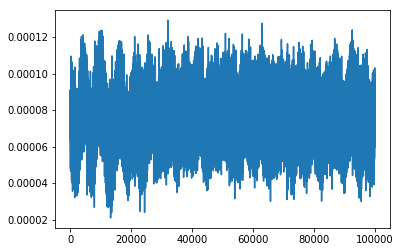

In [27]:
plot(geo[:100000])

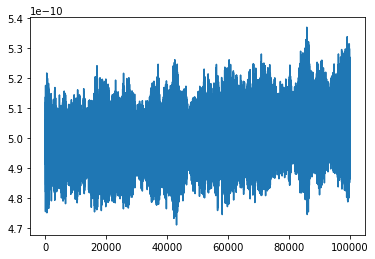

In [26]:
plot(dat[:100000,0])

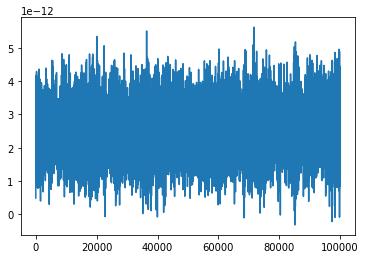

In [28]:
plot(liy[:100000])

In [9]:
nc = cancel.Cancel(fit_cancel(geo),fit_cancel(liy),1/10000,p=[200000,50000,5])

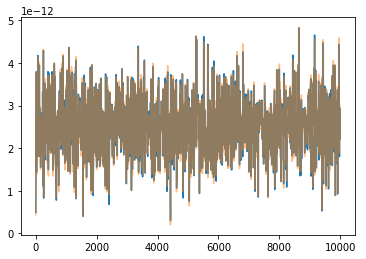

In [24]:
# a=9000000
a=10000
plot(liy[:a])
plot(liy[:a]-stmpy.tools.butter_lowpass_filter(nc.create_drive(fit_cancel(geo[:a])), ncutoff=300/10000),alpha=0.5)


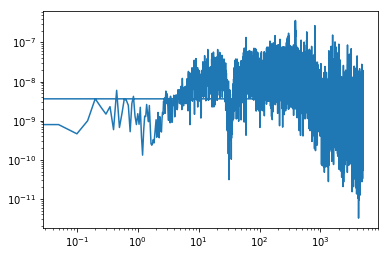

In [16]:
loglog(nc.freqs,abs(nc.transf(nc.freqs)))

In [ ]:
plot(dat[::1000,0]*1e12)
ylabel('Current (pA)')
xlabel('Sample Number')

In [ ]:
plot(liy[::1000])
ylabel('LIY')
xlabel('Sample Number')

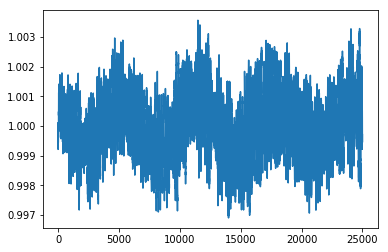

In [12]:
plot(cur_noise)

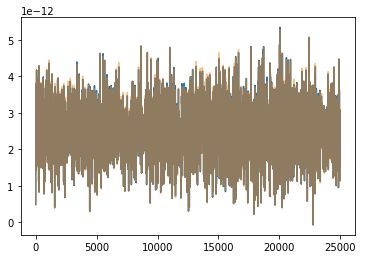

In [16]:
plot(dat[:,-1])
plot(dat[:,-1]/cur_noise,alpha=0.5)
# plot(dat[:,0])
# plot(dat[:,0]/cur_noise,alpha=0.5)

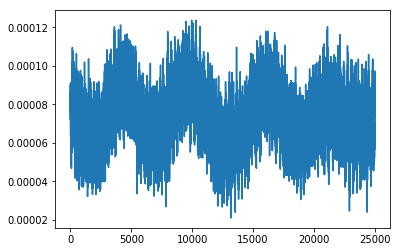

In [7]:
plot(dat[:,2])

C:\Users\Albert Chien\AppData\Roaming\Python\Python36\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


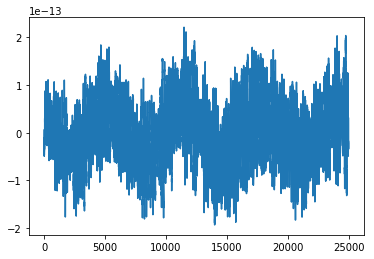

In [9]:
plot(create_drive(dat[:,2],1/10000,transf,freqs))